# Accessibility Scan

This Jupyter notebook processes the necessary data file of `data_out/errors-different-counts-a11y-analyze-errors-summary.csv` generated from the various processing scripts in various phases of the pipeline. The result of this notebook when executed will result in the generation of `Figure 7` as described in the accompanying paper.

This file generates 2 figures;
 - 7(a) Heatmap respresents errors reported by aXe engine
 - 7(b) Heatmap respresents errors reported by HTMLCS engine
 

## Required Libraries:
- `matplotlib`
- `numpy`
- `pandas`
- `seaborn`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns

In [2]:
different_errors = pandas.read_csv('data_out/errors-different-counts-a11y-analyze-errors-summary.csv')

In [24]:
error_grid = different_errors[different_errors['Type'] == 'error'].pivot(index='Theme', columns=['Runner', 'DetailCode'], values='count')
# error_grid['image-alt-relative'] = df.apply

## Figure 7(a): Heatmap of Errors Types from aXe Engine

In [21]:
axe_errors = error_grid['axe']

In [22]:
axe_error_columns = axe_errors.columns

reassignment = {}

for i, column_name in enumerate(axe_error_columns):
    reassignment[column_name] = f'AXE-E{i+1}'

print(reassignment)

axe_errors.rename(columns=reassignment, inplace=True)
axe_errors

{'color-contrast': 'AXE-E1', 'image-alt': 'AXE-E2', 'link-in-text-block': 'AXE-E3', 'link-name': 'AXE-E4', 'bypass': 'AXE-E5', 'audio-caption': 'AXE-E6', 'aria-hidden-focus': 'AXE-E7', 'aria-input-field-name': 'AXE-E8', 'aria-required-parent': 'AXE-E9', 'region': 'AXE-E10'}


/var/folders/dc/xdk576qx24scdpc33nxjckjc0000gn/T/ipykernel_31417/3317756783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axe_errors.rename(columns=reassignment, inplace=True)


DetailCode,AXE-E1,AXE-E2,AXE-E3,AXE-E4,AXE-E5,AXE-E6,AXE-E7,AXE-E8,AXE-E9,AXE-E10
Theme,,,,,,,,,,
darcula,14925118,297021,79246,4721,2277,633,77,47,38,5
dark,3420965,297021,79246,4720,2278,635,77,46,28,5
horizon,2561526,297021,79246,4722,2278,633,77,47,38,5
light,9779805,296992,1103,4719,2276,634,81,46,10,5
material-darker,5165510,297021,79246,4720,2279,635,77,47,28,5
solarized,7428277,297021,79557,4718,2276,633,77,47,28,5


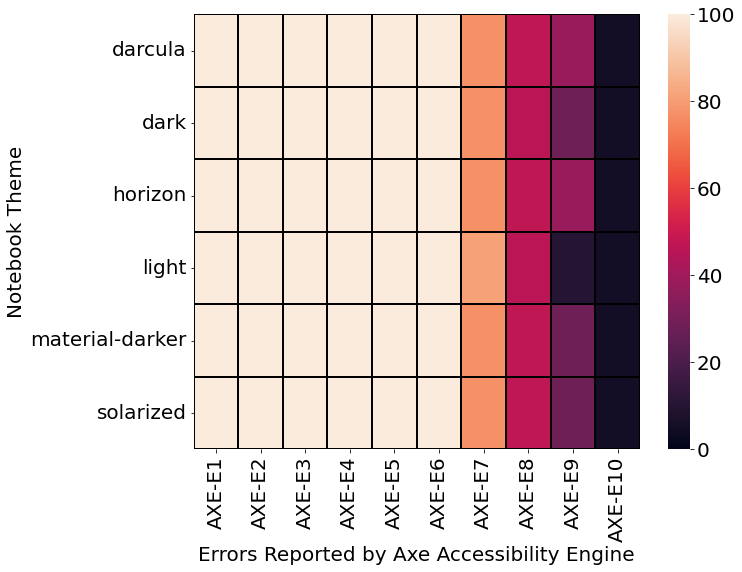

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
matplotlib.rcParams.update({'font.size': 20})
sns.heatmap(axe_errors, robust=True, linewidths=0.1, linecolor='black', ax=ax, vmin=0, vmax=100)
ax.set_ylabel('Notebook Theme', fontsize=20)
ax.set_xlabel('Errors Reported by Axe Accessibility Engine', fontsize=20)
plt.savefig('plot_out/fig-7a-errors-axe-heatmap.pdf', bbox_inches='tight')

**Figure 7(a)** The heatmap of errors for aXe indicates the percentage of errors of different types. The type of errors are presented on the x axis and the themes along the y axis with each cell ranging between 0 and 100.0. The corresponding legend of the color bar is to the right side of the figure.

---------

## Figure 7(b): Heatmap of Errors Types from HTMLCS Engine

In [15]:
htmlcs_errors = error_grid['htmlcs']

htmlcs_error_columns = htmlcs_errors.columns

htmlcs_reassignment = {}

for i, column_name in enumerate(htmlcs_error_columns):
    htmlcs_reassignment[column_name] = f'HTMLCS-E{i+1}'

# print(htmlcs_reassignment)

htmlcs_errors.rename(columns=htmlcs_reassignment, inplace=True)

/var/folders/dc/xdk576qx24scdpc33nxjckjc0000gn/T/ipykernel_31417/2220609700.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htmlcs_errors.rename(columns=htmlcs_reassignment, inplace=True)


In [16]:
columns = htmlcs_errors.columns.tolist()
for updated_column in columns:
    normalizer = htmlcs_errors[updated_column].max()
    htmlcs_errors[updated_column] = htmlcs_errors[updated_column] / normalizer * 100.0


/var/folders/dc/xdk576qx24scdpc33nxjckjc0000gn/T/ipykernel_31417/1479320237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htmlcs_errors[updated_column] = htmlcs_errors[updated_column] / normalizer * 100.0


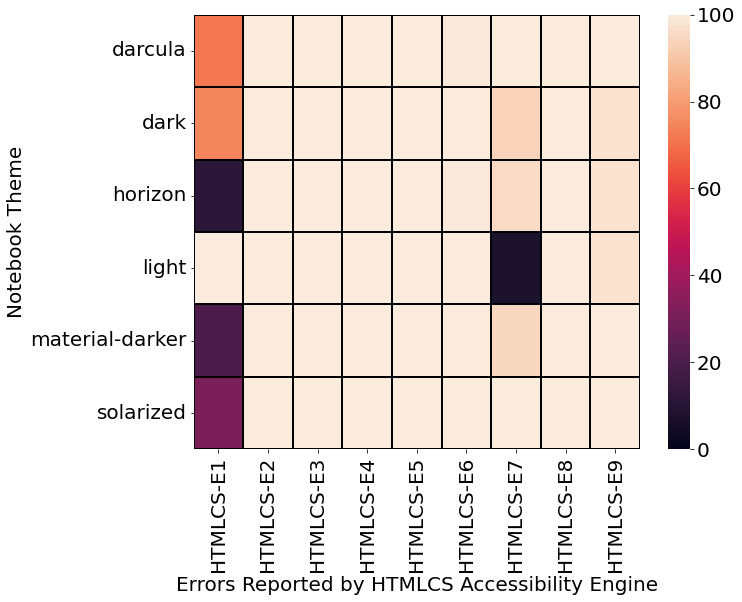

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
matplotlib.rcParams.update({'font.size': 20})
sns.heatmap(htmlcs_errors, robust=True, linewidths=0.1, linecolor='black', ax=ax, vmin=0, vmax=100)
ax.set_ylabel('Notebook Theme', fontsize=20)
ax.set_xlabel('Errors Reported by HTMLCS Accessibility Engine', fontsize=20)
plt.savefig('plot_out/fig-7b-errors-htmlcs-heatmap.pdf', bbox_inches='tight')

**Figure 7(b)** is similar to 7a, but contains 9 error types instead of 10 in 7a. The key for the error codes along the x axis for both figures are presented in Table 4.

------------